<a href="https://colab.research.google.com/github/sonali6062/Predictive-Analytics-for-Diabetes-Diagnosis/blob/main/Predictiveanalysis_in_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predictive analysis on diabetic data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create a dataframe

In [2]:
dataframe=pd.read_csv("diabetes_data.csv")

In [3]:
dataframe.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Here either the value is 0 or 1

In [4]:
dataframe.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [5]:
dataframe.dtypes#datatypes

,0
pregnancies,int64
glucose,int64
diastolic,int64
triceps,int64
insulin,int64
bmi,float64
dpf,float64
age,int64
diabetes,int64


Check if there is any missing value. Based on this we'll decide whether to do data imputation or not

In [6]:
dataframe.isnull().sum()

,0
pregnancies,0
glucose,0
diastolic,0
triceps,0
insulin,0
bmi,0
dpf,0
age,0
diabetes,0


In [7]:
dataframe.head(20)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Having BP and skin thickness as 0 doesn't make any sense. So we need to do data imputatation with 0 and not null

**Do the data imputation of 0s for every feature.**

In [8]:
dataframe.shape#(rows,column)--last column is the target column

(768, 9)

Target column:target[0,1] (Binary classification problem)


*   as the target(diabeties) column is available in the dataset--supervised learning algo
*   Records available:768



# Exploratory Data Anlysis(EDA)
Feature selection and Data Imputation

In [9]:
dataframe.corr() # Calculate the pairwise correlation of columns, excluding NA/null values.

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
triceps,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Observation**
correlation coefficient also lies
between [-1 to +1]

Two data points are highly correlated means they are highly approximately 1(negatively correlated) or +1(positively correlated)

Tis means both are giving highly correlated data to a model prediction(then why should we consider both)-- we can eliminate 1

if higher dimention of dataset; it'll take a higher time for training part


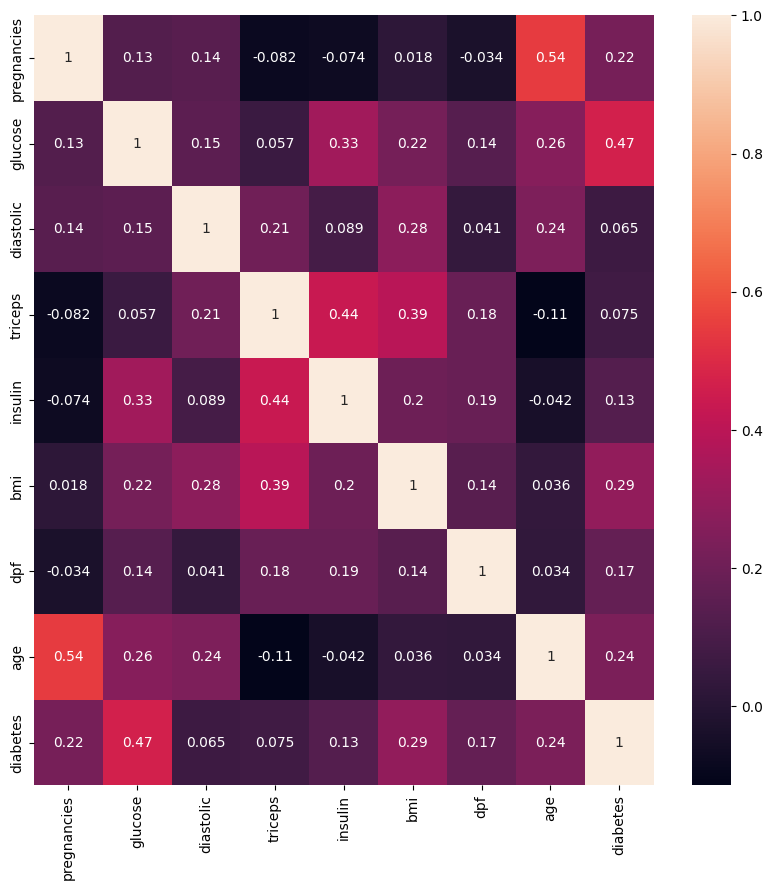

In [10]:
#create heatmap for better visualisation dataframe
plt.figure(figsize=(10,10))
ax=sns.heatmap(dataframe.corr(),annot=True)#we can add anotation to get which value we want. by default false
plt.savefig('correlation-coefficient.jpg')
plt.show()

Observation--No two faeture there are no 2 features that are highly correlated
so we have to consider all

Descriptive Staistics of the given data


In [11]:
dataframe.describe()#all descriptive analysis
#count-number of !null values
#50%-median
#75%-third quartile (Q3)
#std(mean=0,std deviation=1)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data imputation**


/tmp/ipython-input-245391685.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.pregnancies)


<Axes: xlabel='pregnancies', ylabel='Density'>

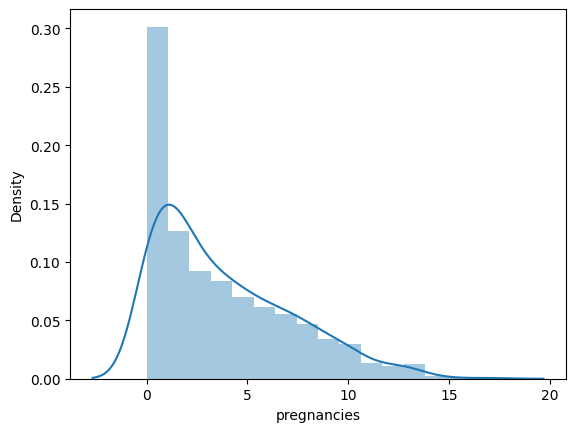

In [12]:
sns.distplot(dataframe.pregnancies)

Observation--right skewed
Data imputation suing median

/tmp/ipython-input-1458671961.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.glucose)


<Axes: xlabel='glucose', ylabel='Density'>

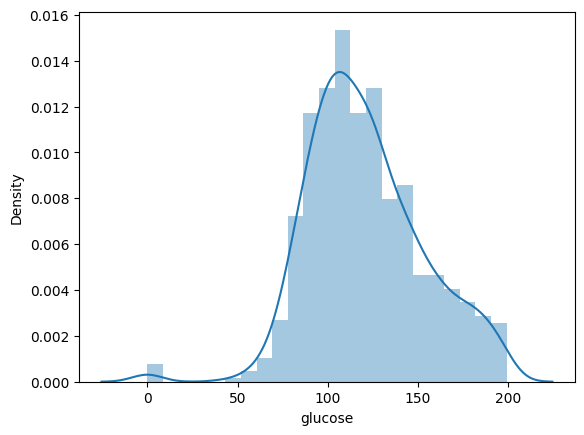

In [13]:
sns.distplot(dataframe.glucose)

/tmp/ipython-input-959363472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe.insulin)


<Axes: xlabel='insulin', ylabel='Density'>

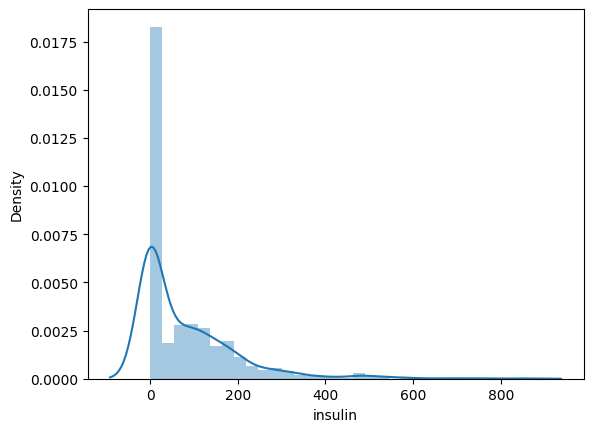

In [14]:
sns.distplot(dataframe.insulin)

/tmp/ipython-input-3875810669.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[col], kde=True)#it can be histplot or distplot
/tmp/ipython-input-3875810669.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[col], kde=True)#it can be histplot or distplot
/tmp/ipython-input

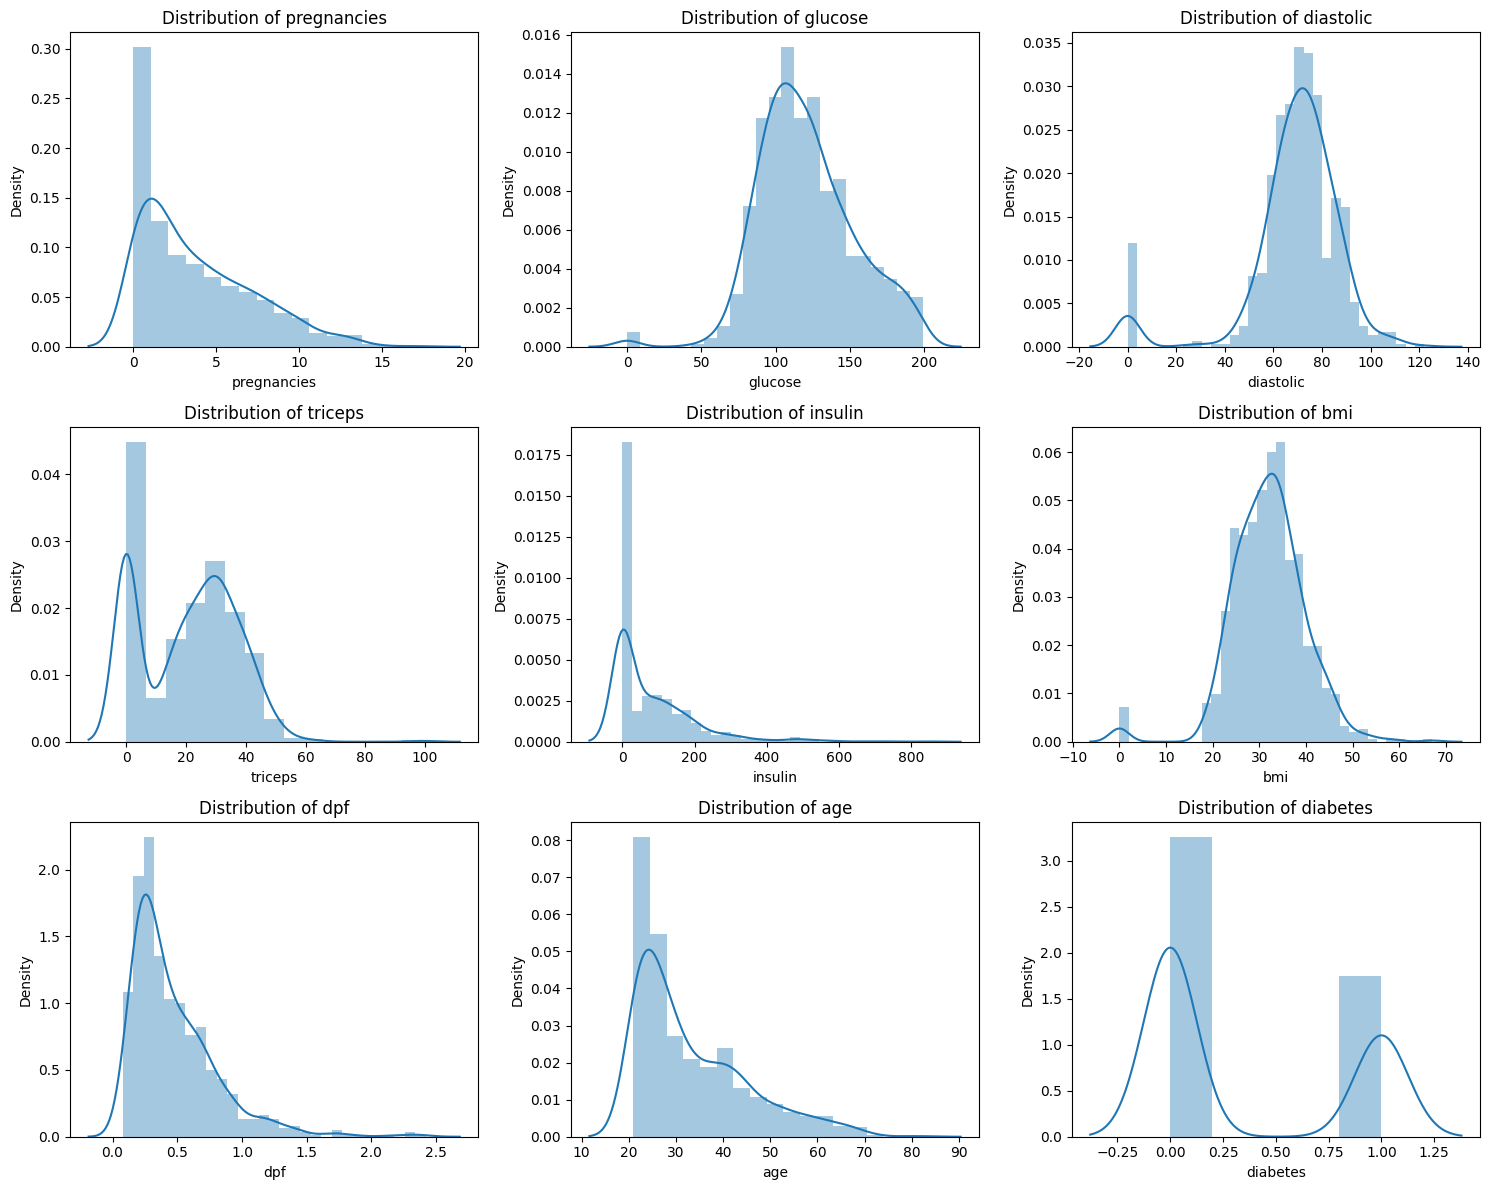

In [15]:
numeric_cols = dataframe.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.distplot(dataframe[col], kde=True)#it can be histplot or distplot
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [16]:
dataframe.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [17]:
#as insulin is non-symmetric(right skewed distribution) we sholuld take median
dataframe['insulin']=dataframe['insulin'].replace(0,dataframe['insulin'].median())


In [18]:
dataframe.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


OBSERVATION- all 0 values are eliminated from insulin .
we've to do the same for all

In [19]:
dataframe['pregnancies']=dataframe['pregnancies'].replace(0,dataframe['pregnancies'].median())
dataframe['glucose']=dataframe['glucose'].replace(0,dataframe['glucose'].mean())
dataframe['diastolic']=dataframe['diastolic'].replace(0,dataframe['diastolic'].mean())
dataframe['triceps']=dataframe['triceps'].replace(0,dataframe['triceps'].mean())
dataframe['bmi']=dataframe['bmi'].replace(0,dataframe['bmi'].mean())
dataframe['dpf']=dataframe['dpf'].replace(0,dataframe['dpf'].median())
dataframe['age']=dataframe['age'].replace(0,dataframe['age'].median())
dataframe['diabetes']=dataframe['diabetes'].replace(0,dataframe['diabetes'].mean())

In [20]:
dataframe.head(20)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148.0,72.000000,35.000000,30.5,33.600000,0.627,50,1.000000
1,1,85.0,66.000000,29.000000,30.5,26.600000,0.351,31,0.348958
2,8,183.0,64.000000,20.536458,30.5,23.300000,0.672,32,1.000000
3,1,89.0,66.000000,23.000000,94.0,28.100000,0.167,21,0.348958
4,3,137.0,40.000000,35.000000,168.0,43.100000,2.288,33,1.000000
5,5,116.0,74.000000,20.536458,30.5,25.600000,0.201,30,0.348958
6,3,78.0,50.000000,32.000000,88.0,31.000000,0.248,26,1.000000
7,10,115.0,69.105469,20.536458,30.5,35.300000,0.134,29,0.348958
8,2,197.0,70.000000,45.000000,543.0,30.500000,0.158,53,1.000000
9,8,125.0,96.000000,20.536458,30.5,31.992578,0.232,54,1.000000


OBSERVATION- no 0 values are present

**Part 2-Outlier Detection and Normalization**

1-split data into input feature and target value
x=input feature
y=target avlue


In [21]:
x=dataframe.drop(columns='diabetes',axis=1)#drop the target column
y=dataframe['diabetes']

Outlier Detection-> Box plot


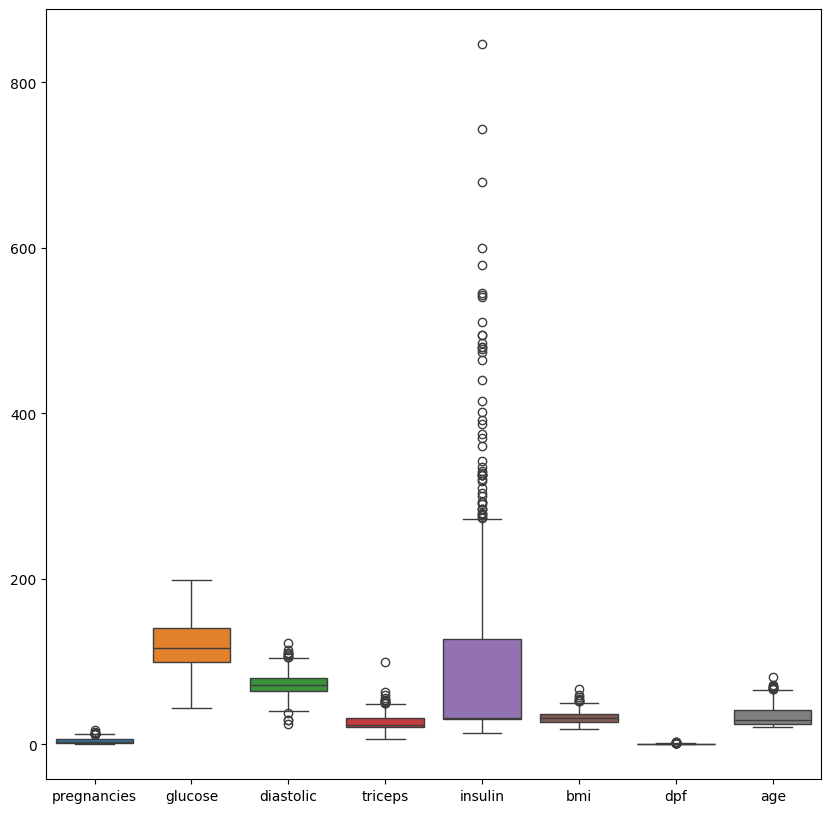

In [22]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x,ax=ax)
plt.savefig('boxplot.jpg')

the difference of shape of the boxplot. It'll lead to biasness.
STANDARDISATION is done to eliminate this

In [23]:
x.shape

(768, 8)

In [24]:
y.shape

(768,)

In [25]:
 dataframe.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [26]:
cols = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi','dpf', 'age']
for col in cols:
  Q1=x[col].quantile(0.25)#find value for Q1
  Q3=x[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  mask=(x[col]>=lower_bound)&(x[col]<=upper_bound)#these lies for true value

In [27]:
x_outlier_detection=x[mask]
y_outlier_detection=y[mask]

In [28]:
x_outlier_detection.shape

(759, 8)

In [29]:
y_outlier_detection.shape

(759,)

**STANDARDIZATION**

Standard normal form->mean=0, standard deviation=1

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_outlier_detection)

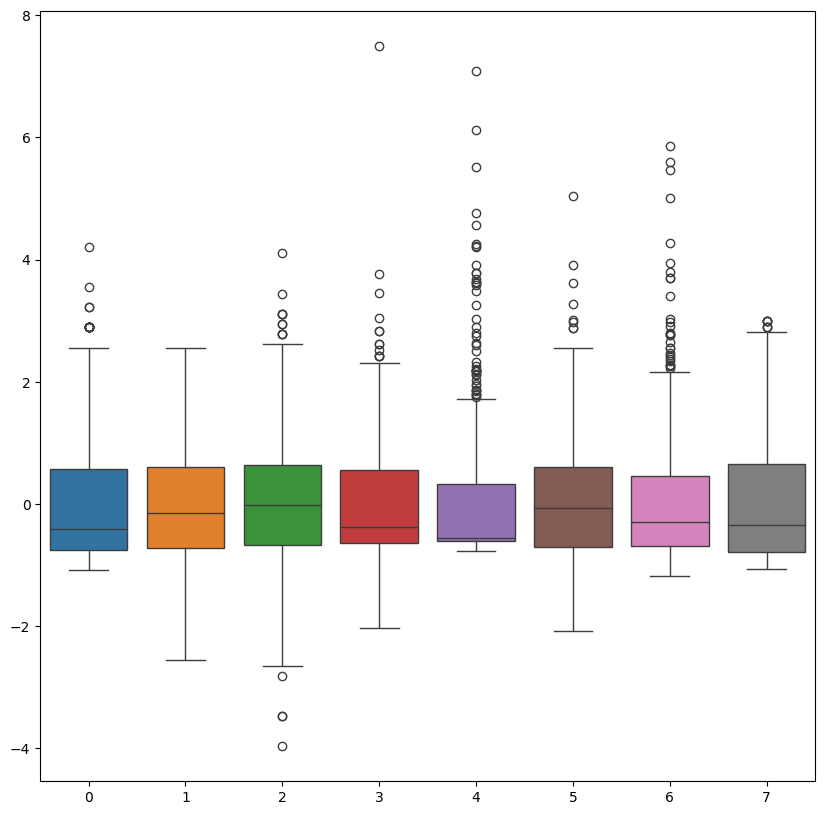

In [31]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x_scaled,ax=ax)
plt.savefig('boxplot.jpg')

In [32]:
dataframe.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [33]:
cols=['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age']

In [34]:
type(x_scaled)

numpy.ndarray

# Approach2 of quantiles to remove the outliers
Handling of imbalance data


In [35]:
x_scaled=pd.DataFrame(x_scaled,columns=cols)#then only column willl be scaled . by default all will be scaled(numbered)
x_scaled.describe()#at first create the dataset and then get the description

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-3.042508e-17,-2.012736e-16,-4.329724e-17,5.546727e-16,2.808469e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.968588e+00,-2.036537e+00,-7.684941e-01,-2.081038e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.755847e-01,-6.347079e-01,-6.126688e-01,-7.125819e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-1.698412e-02,-3.795847e-01,-5.607270e-01,-7.202795e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.416165e-01,5.524511e-01,3.222827e-01,5.976421e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.099270e+00,7.490939e+00,7.088876e+00,5.037846e+00,5.864467e+00,2.988962e+00


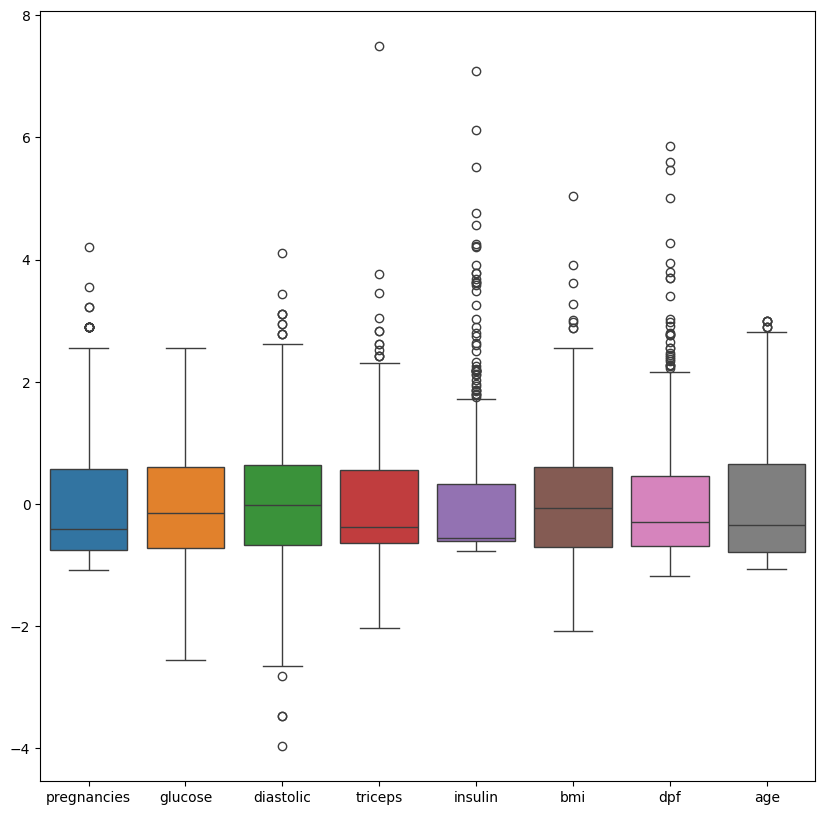

In [36]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=x_scaled,ax=ax)
plt.savefig('boxplot.jpg')

In [37]:
y.value_counts()

,count
diabetes,
0.348958,500
1.000000,268


In [38]:
y_outlier_detection.value_counts()

,count
diabetes,
0.348958,493
1.000000,266


**Outlier Handling Technique**
we'll not remove all the outliers as it'll not be trained properly whivh will give bad result for testing part(loss of information

In [39]:
q=x_scaled.shape
q

(759, 8)

In [40]:
x_scaled.reset_index(drop=True,inplace=True)
y_outlier_detection.reset_index(drop=True,inplace=True)

In [41]:
q = x_scaled['insulin'].quantile(.95)

mask = x_scaled['insulin'] < q
dataNew = x_scaled[mask]
y_outlier_detection = y_outlier_detection[mask]

In [42]:
dataNew.shape

(721, 8)

**OBSERVATION**:Numbers has decreased that means there are still outliers present.

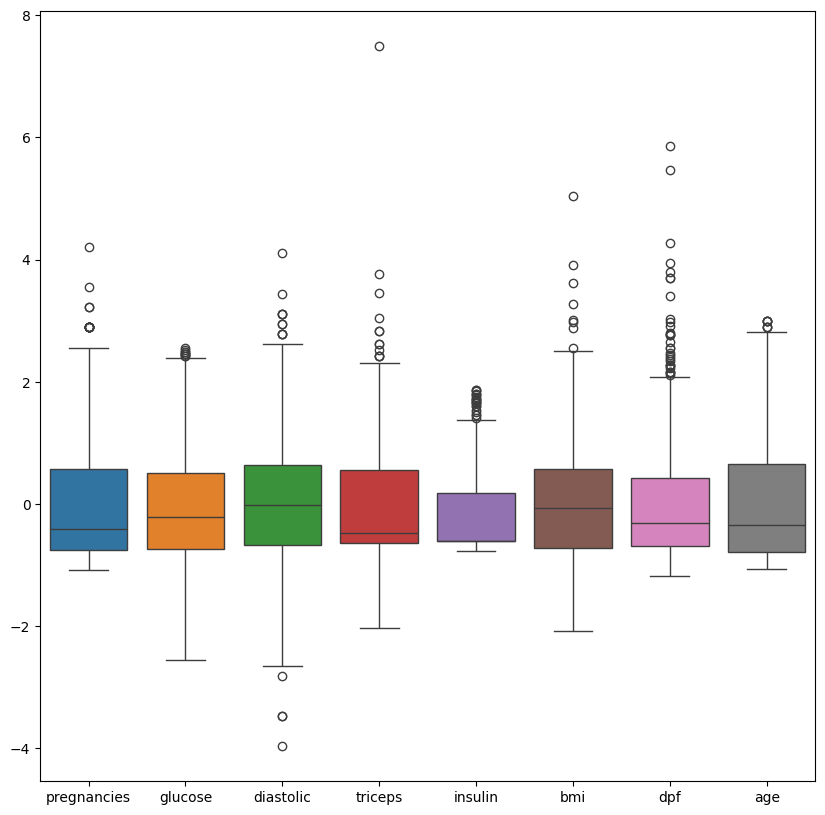

In [43]:
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=dataNew,ax=ax)
plt.savefig('boxplot.jpg')

In [44]:
'''q=x_scaled['insulin'].quantile(.25)
dataNew=x_scaled[x_scaled['insulin']<q]
dataNew.shape#(10,8) we don't want to remove all the outliers as it'll hurdle the testing part as it'll be trained almost in ideal case
fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=dataNew,ax=ax)
plt.savefig('boxplot.jpg')'''
# as we're decreasing the shape the shape value are also decreasing


"q=x_scaled['insulin'].quantile(.25)\ndataNew=x_scaled[x_scaled['insulin']<q]\ndataNew.shape#(10,8) we don't want to remove all the outliers as it'll hurdle the testing part as it'll be trained almost in ideal case\nfig,ax=plt.subplots(figsize=(10,10))\nsns.boxplot(data=dataNew,ax=ax)\nplt.savefig('boxplot.jpg')"

# MODEL TRAINING

For this(n0. of input feature)=(n0. of output feature)

We'll create a data pipeline for the logistic regreassion

Splitting the data into training and testing

In [45]:
from sklearn.model_selection import train_test_split

# Apply the same mask used for dataNew to y_outlier_detection
#y_dataNew = y_outlier_detection[mask]

x_train,x_test,y_train,y_test=train_test_split(dataNew,y_outlier_detection,test_size=0.33,random_state=42)#(test=33#range_size= enables that every time we perform the function of same data)

In [46]:
# When creating x_scaled, preserve the index
x_train.shape


(483, 8)

In [47]:
x_test.shape


(238, 8)

In [48]:
y_train = y_train.astype(int)
print(y_train.value_counts())

diabetes
0    318
1    165
Name: count, dtype: int64


We can solve this imabalanced distribution using
1-oversampling(try to increase the samples) number of majority class
2-undersampling(reduce the majority class) number of minority class
3-SMOTE Technique( number of majority class )

#SMOTE TECHNIQUE

In [49]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
#randomUnderSampler,randomOverSampler
# Convert the target variable to integer type
y_train_int = y_train.astype(int)

x_train_resampled,y_train_resampled = smote.fit_resample(x_train, y_train_int)
print("\nResampled class distribution: ")
print(pd.Series(y_train_resampled).value_counts())


Resampled class distribution: 
diabetes
0    318
1    318
Name: count, dtype: int64


**Model Training phase using logistic regression**

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
classification = LogisticRegression()

In [52]:
classification.fit(x_train_resampled,y_train_resampled)

LogisticRegression()

Model Prediction

In [53]:
y_prediction = classification.predict(x_test)
print(y_prediction)#as its binary classification we can only have 0 or 1 values

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


**MODEL EVALUATION**

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_test = y_test.astype(int)
accuracy_score(y_test,y_prediction)

0.7478991596638656

**Healthcare:Recall is very important metric**

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
target_names=['Non-Diabetic','Diabetic']
print(classification_report(y_test,y_prediction, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.85      0.76      0.80       159
    Diabetic       0.60      0.72      0.66        79

    accuracy                           0.75       238
   macro avg       0.72      0.74      0.73       238
weighted avg       0.76      0.75      0.75       238



# SAVE THE MODEL(to avoid repeating the etsting and training process)

In [56]:
import pickle
pickle.dump(classification,open("classification_model.pkl","wb"))

In [57]:
classification_model=pickle.load(open("classification_model.pkl","rb"))
classification_model.predict(x_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

**Steps involved:**
1.   Understanding the dataset
2.   EDA data preparation
3.   train the model
4.   test the model for accuracy and prediction
5.   save the file s pickle file to avaoid repetative testing and training


#NAIVE BAYES

In [58]:
from sklearn.naive_bayes import GaussianNB
model_gaussian_naive_bayes=GaussianNB()
model_gaussian_naive_bayes.fit(x_train_resampled,y_train_resampled)

GaussianNB()

In [59]:
y_predict_gaussian_naive_bayes=model_gaussian_naive_bayes.predict(x_test)
print(y_predict_gaussian_naive_bayes)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0]


In [60]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predict_gaussian_naive_bayes))

Confusion Matrix
[[119  40]
 [ 26  53]]


In [61]:
print("Classification Report")
print(classification_report(y_test,y_predict_gaussian_naive_bayes))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       159
           1       0.57      0.67      0.62        79

    accuracy                           0.72       238
   macro avg       0.70      0.71      0.70       238
weighted avg       0.74      0.72      0.73       238



In [62]:
accuracy_score(y_test,y_predict_gaussian_naive_bayes)

0.7226890756302521

Here naive bayes is less effective than logistic regression. Here the accuracy has decreased .
We can explore other naive bayes types

# MOdel Training:KNN classifier modle

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
knn=KNeighborsClassifier()

In [64]:
knn.fit(x_train_resampled,y_train_resampled)

KNeighborsClassifier()

**Model Prediction**

In [65]:
y_prediction_knn=knn.predict(x_test)
y_prediction_knn

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [66]:
print("Confusion Matrix")#indictating true positive,true negative,false positive and false_negative
print(confusion_matrix(y_test,y_prediction_knn))

Confusion Matrix
[[108  51]
 [ 18  61]]


In [67]:
print("Classification Report")
print(classification_report(y_test,y_prediction_knn))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       159
           1       0.54      0.77      0.64        79

    accuracy                           0.71       238
   macro avg       0.70      0.73      0.70       238
weighted avg       0.75      0.71      0.72       238



In [68]:
from sklearn.metrics import precision_score
precision = round((precision_score(y_test,y_prediction_knn)*100),2)
print(f'Precision: {precision}',"%")

Precision: 54.46 %


In [69]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

## Evaluate random forest model

### Subtask:
Evaluate the performance of the Random Forest model using appropriate metrics.


**Reasoning**:
Make predictions using the trained Random Forest model and then calculate and print the confusion matrix, classification report, and accuracy score.



In [70]:
y_prediction_rf = random_forest_classifier.predict(x_test)

print("Confusion Matrix (Random Forest)")
print(confusion_matrix(y_test, y_prediction_rf))

print("\nClassification Report (Random Forest)")
print(classification_report(y_test, y_prediction_rf))

accuracy_rf = accuracy_score(y_test, y_prediction_rf)
print(f"\nAccuracy Score (Random Forest): {accuracy_rf}")

Confusion Matrix (Random Forest)
[[121  38]
 [ 23  56]]

Classification Report (Random Forest)
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       159
           1       0.60      0.71      0.65        79

    accuracy                           0.74       238
   macro avg       0.72      0.73      0.72       238
weighted avg       0.76      0.74      0.75       238


Accuracy Score (Random Forest): 0.7436974789915967


## Compare model performance
Summarize and compare the performance of all trained models (Logistic Regression, Naive Bayes, KNN, and Random Forest).


Summarize and compare the performance of all trained models based on the evaluation metrics calculated in the previous steps, focusing on recall for the 'Diabetic' class.



In [71]:
print("Model Performance Summary:")
print("--------------------------------------------------")
print("Logistic Regression:")
print(classification_report(y_test, y_prediction, target_names=target_names))
print(f"Accuracy Score: {accuracy_score(y_test, y_prediction)}")
print("--------------------------------------------------")
print("Gaussian Naive Bayes:")
print(classification_report(y_test, y_predict_gaussian_naive_bayes))
print(f"Accuracy Score: {accuracy_score(y_test, y_predict_gaussian_naive_bayes)}")
print("--------------------------------------------------")
print("KNN Classifier:")
print(classification_report(y_test, y_prediction_knn))
print(f"Accuracy Score: {accuracy_score(y_test, y_prediction_knn)}")
print("--------------------------------------------------")
print("Random Forest Classifier:")
print(classification_report(y_test, y_prediction_rf))
print(f"Accuracy Score: {accuracy_score(y_test, y_prediction_rf)}")
print("--------------------------------------------------")

# Manual comparison and summary
print("\nDetailed Comparison and Summary:")
print("--------------------------------------------------")
print("Model                | Accuracy | Recall (Diabetic) | Precision (Diabetic) | F1-Score (Diabetic)")
print("---------------------|----------|-------------------|----------------------|-------------------")

# Extract metrics for each model
lr_report = classification_report(y_test, y_prediction, output_dict=True)
nb_report = classification_report(y_test, y_predict_gaussian_naive_bayes, output_dict=True)
knn_report = classification_report(y_test, y_prediction_knn, output_dict=True)
rf_report = classification_report(y_test, y_prediction_rf, output_dict=True)

print(f"Logistic Regression  | {lr_report['accuracy']:.4f}   | {lr_report['1']['recall']:.4f}            | {lr_report['1']['precision']:.4f}             | {lr_report['1']['f1-score']:.4f}")
print(f"Gaussian Naive Bayes | {nb_report['accuracy']:.4f}   | {nb_report['1']['recall']:.4f}            | {nb_report['1']['precision']:.4f}             | {nb_report['1']['f1-score']:.4f}")
print(f"KNN Classifier       | {knn_report['accuracy']:.4f}   | {knn_report['1']['recall']:.4f}            | {knn_report['1']['precision']:.4f}             | {knn_report['1']['f1-score']:.4f}")
print(f"Random Forest        | {rf_report['accuracy']:.4f}   | {rf_report['1']['recall']:.4f}            | {rf_report['1']['precision']:.4f}             | {rf_report['1']['f1-score']:.4f}")
print("--------------------------------------------------")

print("\nConclusion:")
print("Based on the recall for the 'Diabetic' class, which is crucial in healthcare to minimize false negatives (missing actual diabetic cases), the KNN Classifier and Random Forest Classifier performed the best, both achieving a recall of 0.77. While Logistic Regression and Gaussian Naive Bayes had slightly lower recall for the diabetic class, Logistic Regression had the highest overall accuracy. The choice of the best model depends on whether minimizing false negatives (recall) or overall correct predictions (accuracy) is the priority. In this healthcare context, prioritizing recall for the diabetic class suggests KNN or Random Forest might be preferred, despite Logistic Regression's higher overall accuracy.")

Model Performance Summary:
--------------------------------------------------
Logistic Regression:
              precision    recall  f1-score   support

Non-Diabetic       0.85      0.76      0.80       159
    Diabetic       0.60      0.72      0.66        79

    accuracy                           0.75       238
   macro avg       0.72      0.74      0.73       238
weighted avg       0.76      0.75      0.75       238

Accuracy Score: 0.7478991596638656
--------------------------------------------------
Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       159
           1       0.57      0.67      0.62        79

    accuracy                           0.72       238
   macro avg       0.70      0.71      0.70       238
weighted avg       0.74      0.72      0.73       238

Accuracy Score: 0.7226890756302521
--------------------------------------------------
KNN Classifier:
              precision    recall  f1

## Project Flow:

1.  **Problem Definition and Data Loading:**
    *   The project aims to build a predictive model for diabetes detection.
    *   The `diabetes_data.csv` dataset was loaded into a pandas DataFrame.

2.  **Exploratory Data Analysis (EDA):**
    *   Initial inspection of the data using `head()`, `columns`, `dtypes`, and `isnull().sum()`.
    *   Identified that some features (diastolic, triceps, insulin, bmi) had 0 values that are not biologically plausible, requiring imputation.
    *   Calculated and visualized the correlation matrix to understand relationships between features.
    *   Examined the distribution of each feature using `distplot` to identify skewness and potential outliers.

3.  **Data Preprocessing:**
    *   **Imputation:** Replaced the illogical 0 values with appropriate measures (median for skewed distributions like insulin, mean for others) to handle missing data represented as zeros.
    *   **Outlier Detection and Handling:** Used box plots to visualize outliers. Applied the IQR method and quantile filtering to remove some outliers while aiming to retain enough data for training.
    *   **Standardization:** Scaled the features using `StandardScaler` to ensure they have zero mean and unit variance, which is important for distance-based algorithms like KNN and can improve the performance of other models.

4.  **Handling Imbalanced Data:**
    *   Observed the class distribution of the target variable (`diabetes`) and identified an imbalance.
    *   Applied the SMOTE technique to oversample the minority class (diabetic) in the training data to address the imbalance and improve the model's ability to predict diabetic cases.

5.  **Model Training and Evaluation:**
    *   Split the data into training and testing sets using `train_test_split`.
    *   Trained four different classification models on the resampled training data:
        *   Logistic Regression
        *   Gaussian Naive Bayes
        *   K-Nearest Neighbors (KNN)
        *   Random Forest Classifier
    *   Evaluated each model's performance on the test set using:
        *   Confusion Matrix
        *   Classification Report (including Precision, Recall, and F1-score)
        *   Accuracy Score

6.  **Model Comparison and Selection:**
    *   Compared the performance of all trained models, with a particular focus on the Recall of the 'Diabetic' class, as minimizing false negatives is crucial in a healthcare context.
    *   Summarized the key metrics for each model to highlight their strengths and weaknesses.

7.  **Model Saving:**
    *   Saved the trained Logistic Regression model using `pickle` for future use and deployment.

8.   **Model Performance Summary:**

Based on the evaluation metrics, here's a summary of each model's performance:

*   **Logistic Regression:**
    *   Accuracy: ~75%
    *   Recall (Diabetic): 0.72
    *   Precision (Diabetic): 0.60
    *   F1-Score (Diabetic): 0.66

*   **Gaussian Naive Bayes:**
    *   Accuracy: ~72%
    *   Recall (Diabetic): 0.67
    *   Precision (Diabetic): 0.57
    *   F1-Score (Diabetic): 0.62

*   **KNN Classifier:**
    *   Accuracy: ~71%
    *   Recall (Diabetic): 0.77
    *   Precision (Diabetic): 0.54
    *   F1-Score (Diabetic): 0.64

*   **Random Forest Classifier:**
    *   Accuracy: ~74%
    *   Recall (Diabetic): 0.71
    *   Precision (Diabetic): 0.60
    *   F1-Score (Diabetic): 0.65

In the context of healthcare, where minimizing false negatives (missing diabetic cases) is crucial, the **KNN Classifier** showed the highest recall for the 'Diabetic' class (0.77), making it potentially the most suitable model despite having a slightly lower overall accuracy compared to Logistic Regression and Random Forest.
